## AMLDS Final Project Experiments

In [163]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Imports

In [164]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import sklearn
import importlib



In [165]:
importlib.reload(models)
importlib.reload(utils)
importlib.reload(utils.graph_utils)
importlib.reload(visualization.plot_utils)
importlib.reload(main)

import models
import utils
import utils.graph_utils
import visualization.plot_utils
import main

from models import DeGrootThresholdModel
from utils import add_random_edges, assign_edge_weights
from utils.graph_utils import create_sbm_graph, create_random_geometric_graph
from visualization.plot_utils import plot_network, plot_posting_heatmap
from main import run_experiment


## Example experiment

### Build a graph

Random geometric

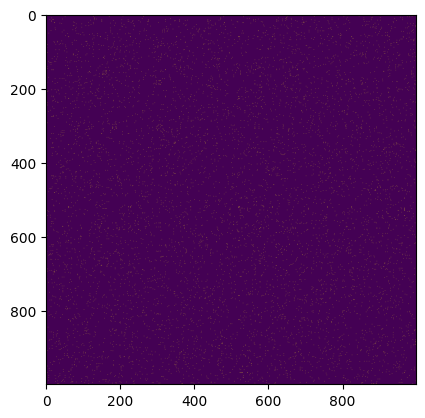

In [166]:
G = create_random_geometric_graph(
        n=1000,  # number of nodes
        radius=0.05 # radius for connection
    )
plt.imshow(np.array(nx.adjacency_matrix(G).todense()))

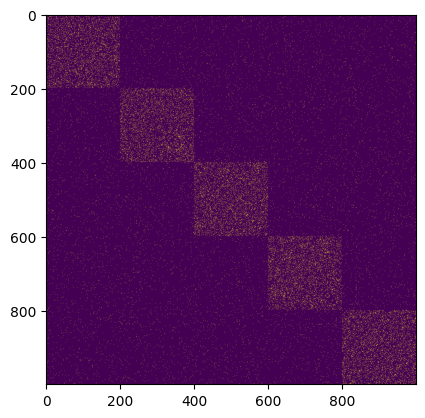

In [167]:
G = create_sbm_graph(
    sizes=[200, 200, 200, 200, 200],  # sizes of communities
    p_intra=0.1,                    # probability within communities
    p_inter=0.01                     # probability between communities
)
plt.imshow(np.array(nx.adjacency_matrix(G).todense()))

### Run DeGroot Model simulation on a given graph

Random geometric

Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37


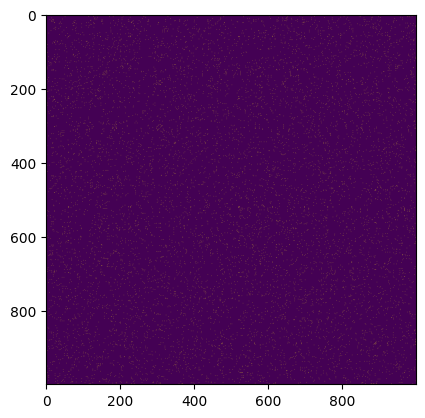

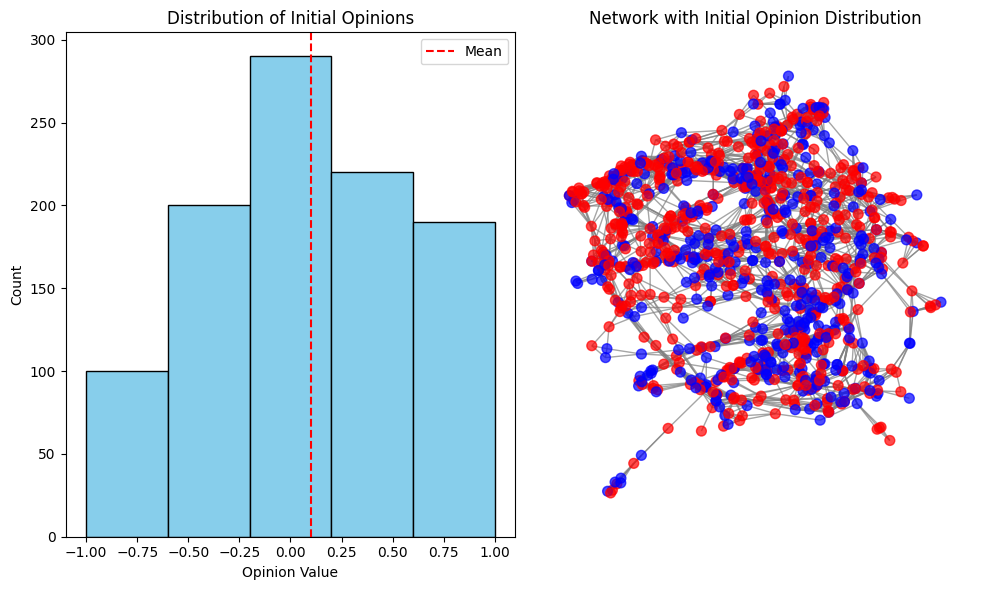

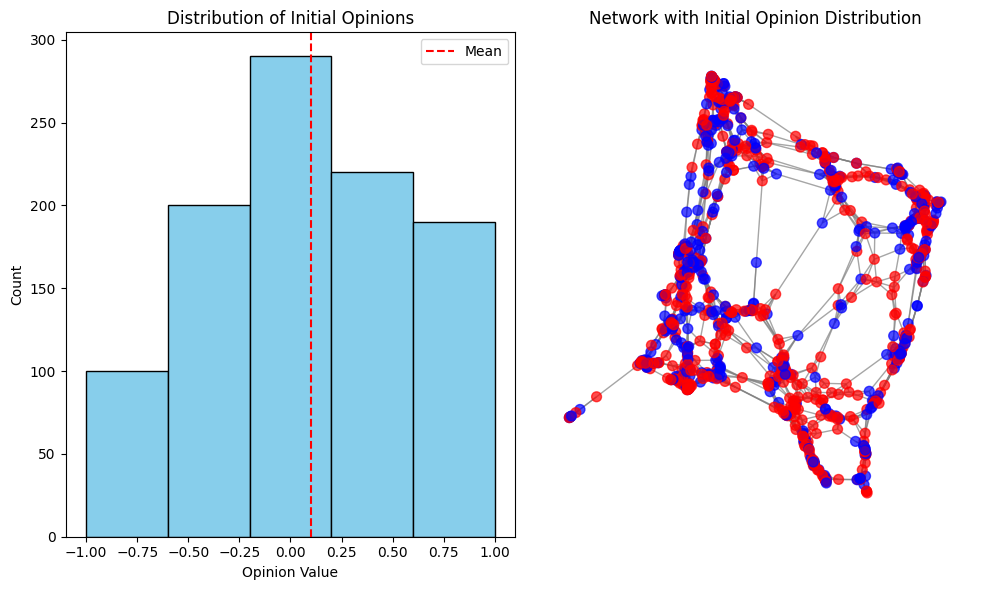

Is the graph connected? True
Are there self loops? False


In [180]:
G = create_random_geometric_graph(
        n=1000,  # number of nodes
        radius=0.057 # radius for connection
    )
plt.imshow(np.array(nx.adjacency_matrix(G).todense()))

# Some quick visualizations

model = DeGrootThresholdModel(G, local_agreement_threshold=0.6)

ispal_op = [-1, -.5, 0, .5, 1]
ispal_prop = [.1, .2, .29, .22, .19] # target 90/10

model.initialize_opinions_manual(
    initial_opinions=ispal_op,
    proportions=ispal_prop
)

model.visualize_distribution(layout='spring')
model.visualize_distribution(layout='spectral')

# Check if graph is connected - needs to be connected for DeGroot model
is_connected = nx.is_connected(G)
print(f"Is the graph connected? {is_connected}")

if not is_connected:
    # Get number of components
    components = list(nx.connected_components(G))
    print(f"Number of connected components: {len(components)}")
    print(f"Sizes of components: {[len(c) for c in components]}")

# Check for self loops
has_self_loops = nx.number_of_selfloops(G)
print("Are there self loops?", has_self_loops > 0)


Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37


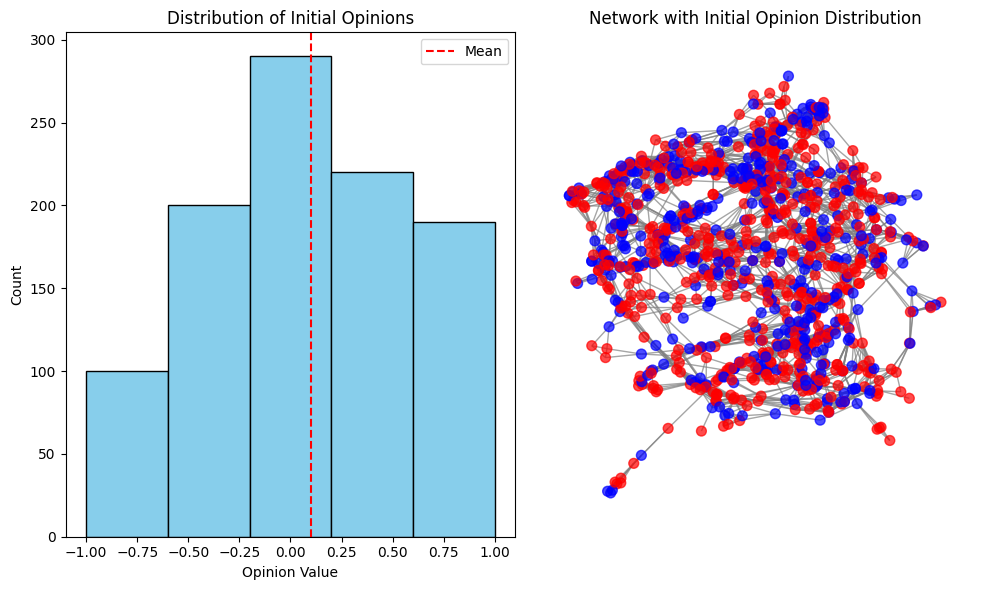

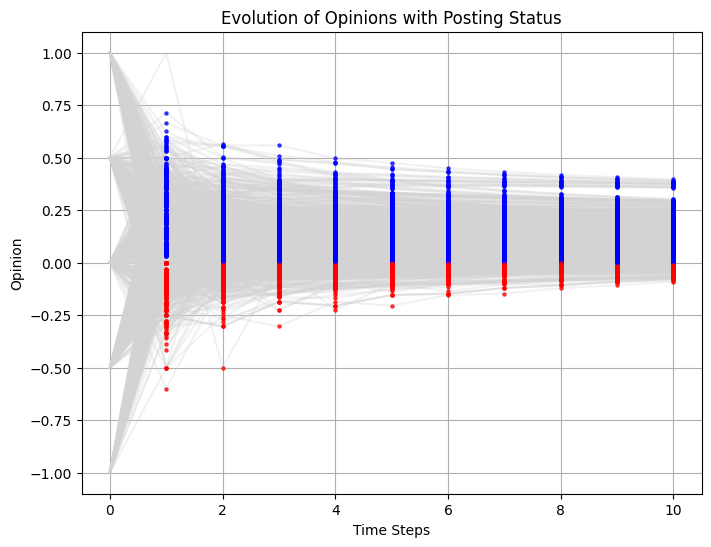

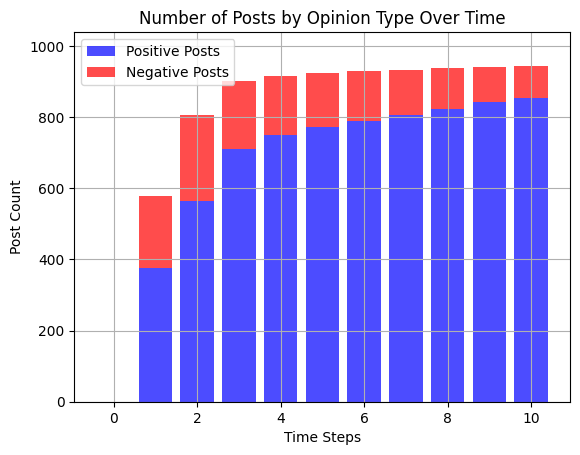

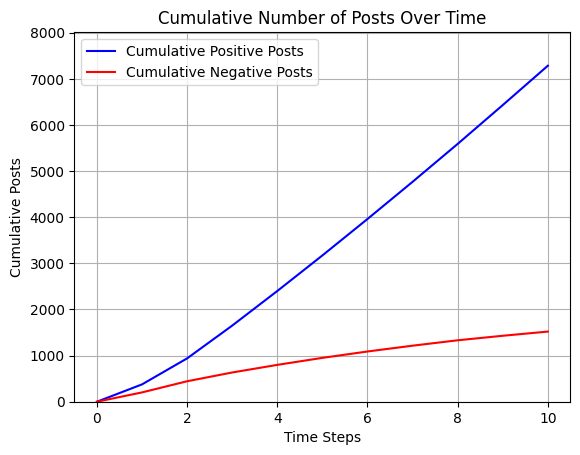

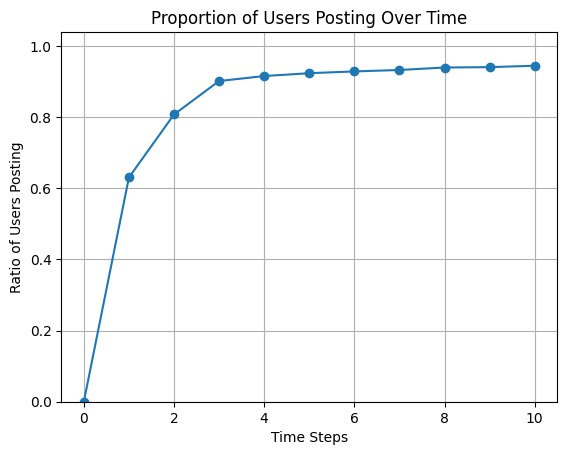

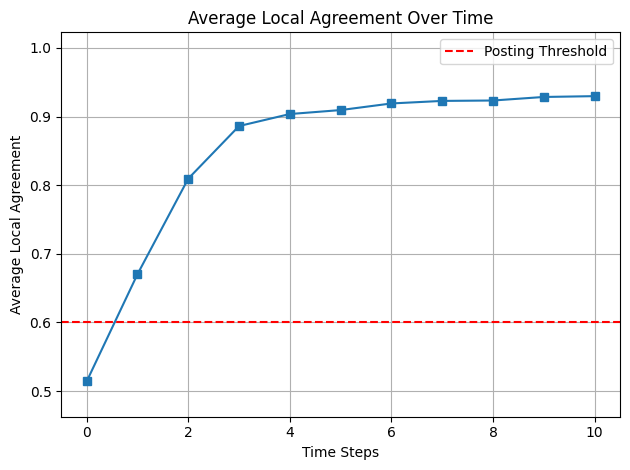

EXPERIMENT STATS:
Total posts: 9189
Positive posts: 7349 (0.80)
Negative posts: 1650 (0.18)

Positive posts ratio: 4.45
Variance in pos/neg ratio over time: 6.1338

Final opinion range: 0.4878
Final opinion variance: 0.0079
Final opinion std dev: 0.0890
Final average local agreement: 0.9297
Final local agreement variance: 0.0208


In [181]:
model = run_experiment(
    graph=G,
    threshold=0.6,
    steps=10, 
    visualize=True
)

Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
EXPERIMENT STATS:
Total posts: 47033
Positive posts: 43104 (0.92)
Negative posts: 3758 (0.08)

Positive posts ratio: 11.47
Variance in pos/neg ratio over time: 47.3904

Final opinion range: 0.1926
Final opinion variance: 0.0011
Final opinion std dev: 0.0337
Final average local agreement: 0.9568
Final local agreement variance: 0.0135
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
EXPERIMENT STATS:
Total posts: 46962
Positive posts: 44146 (0.94)
Negative posts: 2644 (0.06)

Positive posts ratio: 16.70
Variance in pos/neg ratio over time: nan

Final opinion range: 0.1176
Final opinion variance: 0.0007
Final opinion std dev: 0.0269
Final average local agreement: 0.9456
Final local agreement variance: 0.0164
Initial opinion distribution:
  Positi

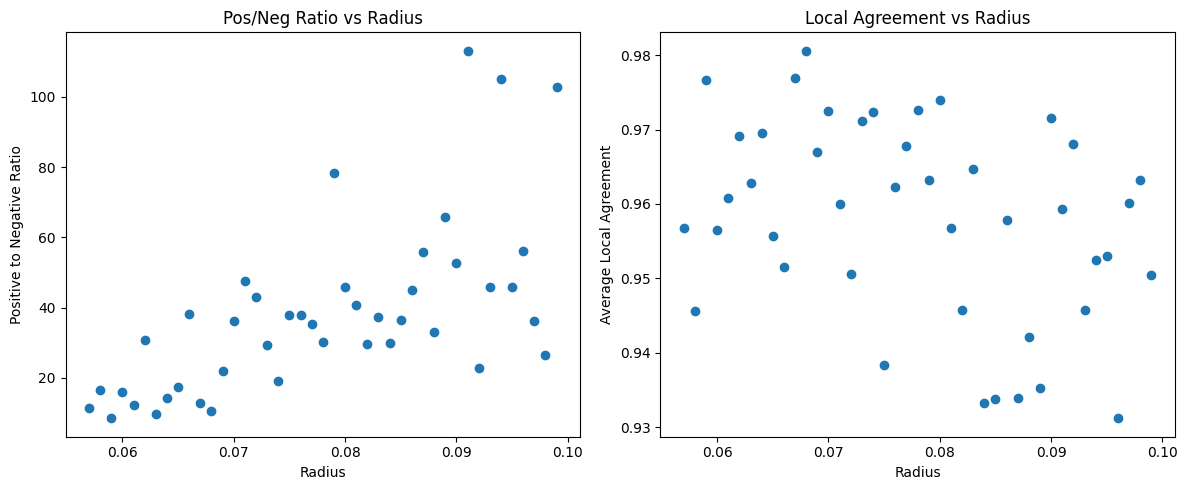

In [ ]:
# Create list of radii from 0.1 to 0.06 with steps of 0.01
radii = np.arange(0.057, 0.1, 0.001)

# Run experiments for different radii
results = []
for radius in radii:
    G = create_random_geometric_graph(
        n=1000,  # number of nodes 
        radius=radius
    )
    
    # Run experiment with visualization off to avoid clutter
    model, pos_to_neg_ratio, pos_to_neg_ratio_var, average_local_agreement = run_experiment(
        graph=G,
        threshold=0.6,
        steps=50,
        visualize=False
    )
    
    results.append({
        'radius': radius,
        'pos_to_neg_ratio': pos_to_neg_ratio,
        'local_agreement': average_local_agreement
    })

# Create scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot pos/neg ratio vs radius
radii_vals = [r['radius'] for r in results]
ratios = [r['pos_to_neg_ratio'] for r in results]
ax1.scatter(radii_vals, ratios)
ax1.set_xlabel('Radius')
ax1.set_ylabel('Positive to Negative Ratio')
ax1.set_title('Pos/Neg Ratio vs Radius')

# Plot local agreement vs radius
agreements = [r['local_agreement'] for r in results]
ax2.scatter(radii_vals, agreements)
ax2.set_xlabel('Radius')
ax2.set_ylabel('Average Local Agreement')
ax2.set_title('Local Agreement vs Radius')

plt.tight_layout()
plt.show()

5-Block SBM

Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37


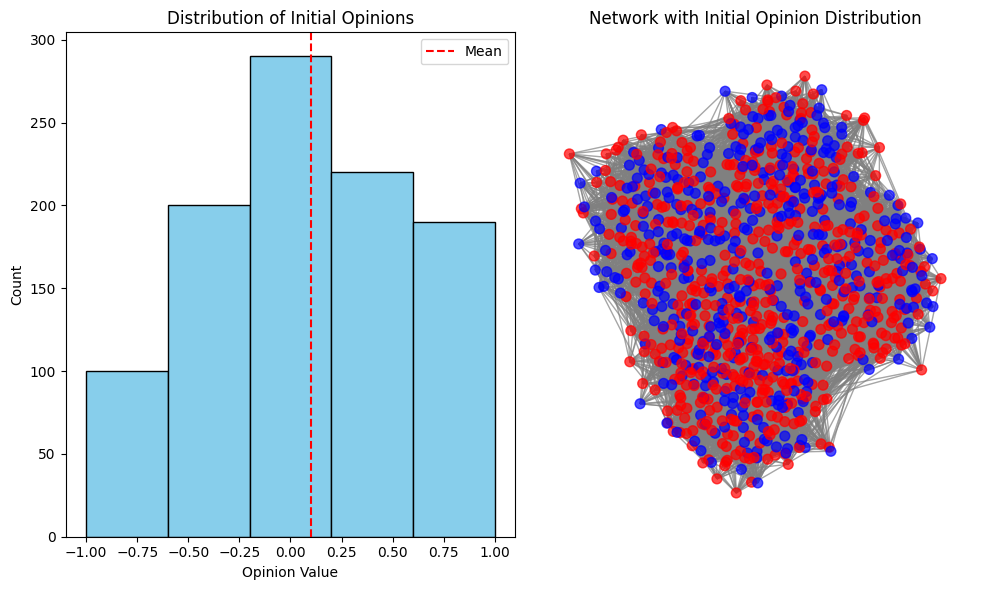

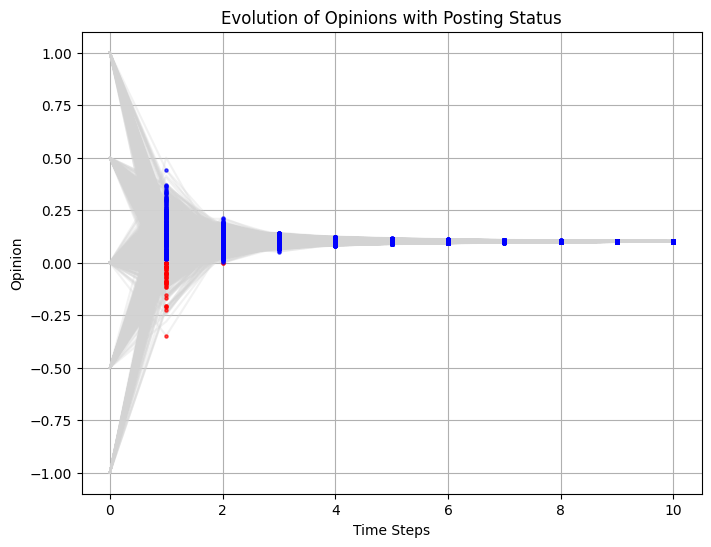

<string>:11: RuntimeWarning: invalid value encountered in scalar divide
<string>:11: RuntimeWarning: divide by zero encountered in scalar divide


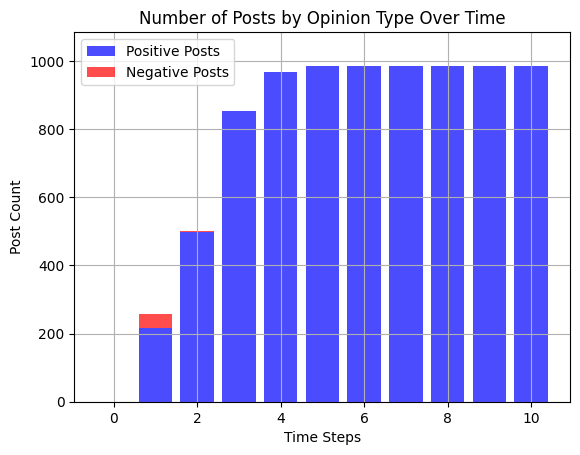

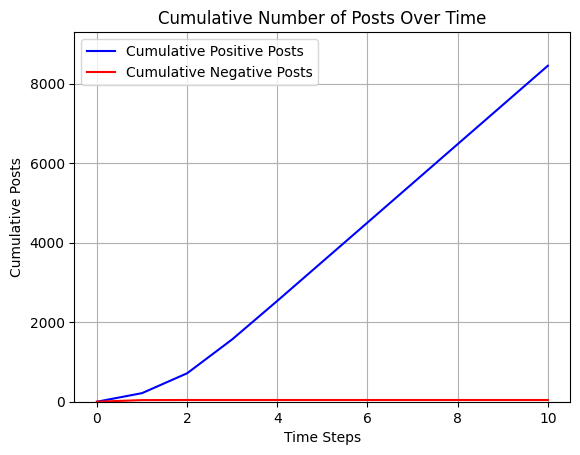

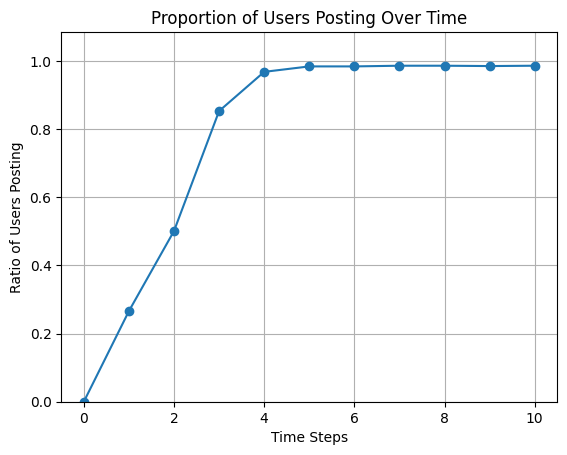

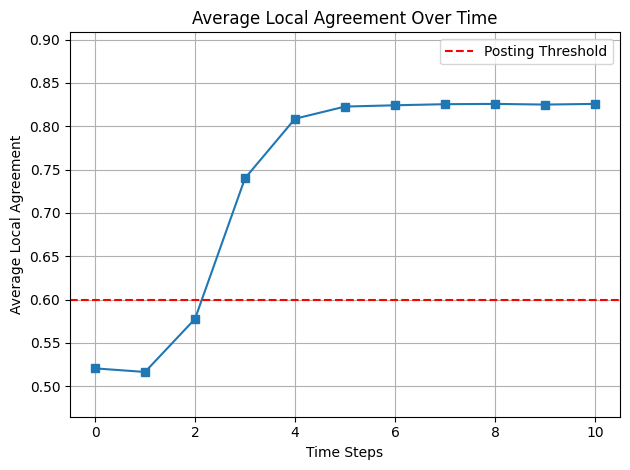

EXPERIMENT STATS:
Total posts: 8788
Positive posts: 8459 (0.96)
Negative posts: 179 (0.02)

Positive posts ratio: 47.26
Variance in pos/neg ratio over time: nan

Final opinion range: 0.0042
Final opinion variance: 0.0000
Final opinion std dev: 0.0011
Final average local agreement: 0.8257
Final local agreement variance: 0.0079


/Users/aratzan/anaconda3/envs/amlds/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [159]:
G = create_sbm_graph(
    sizes=[200, 200, 200, 200, 200],  # sizes of communities
    p_intra=0.1,                    # probability within communities
    p_inter=0.01                     # probability between communities
)

model = run_experiment(
    graph=G,
    threshold=0.6,
    steps=10, 
    visualize=True
)

Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
EXPERIMENT STATS:
Total posts: 45832
Positive posts: 45484 (0.99)
Negative posts: 197 (0.00)

Positive posts ratio: 230.88
Variance in pos/neg ratio over time: nan

Final opinion range: 0.0000
Final opinion variance: 0.0000
Final opinion std dev: 0.0000
Final average local agreement: 0.7983
Final local agreement variance: 0.0144
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
EXPERIMENT STATS:
Total posts: 47336
Positive posts: 47053 (0.99)
Negative posts: 155 (0.00)

Positive posts ratio: 303.57
Variance in pos/neg ratio over time: nan

Final opinion range: 0.0000
Final opinion variance: 0.0000
Final opinion std dev: 0.0000
Final average local agreement: 0.8164
Final local agreement variance: 0.0081
Initial opinion distribution:
  Positive o

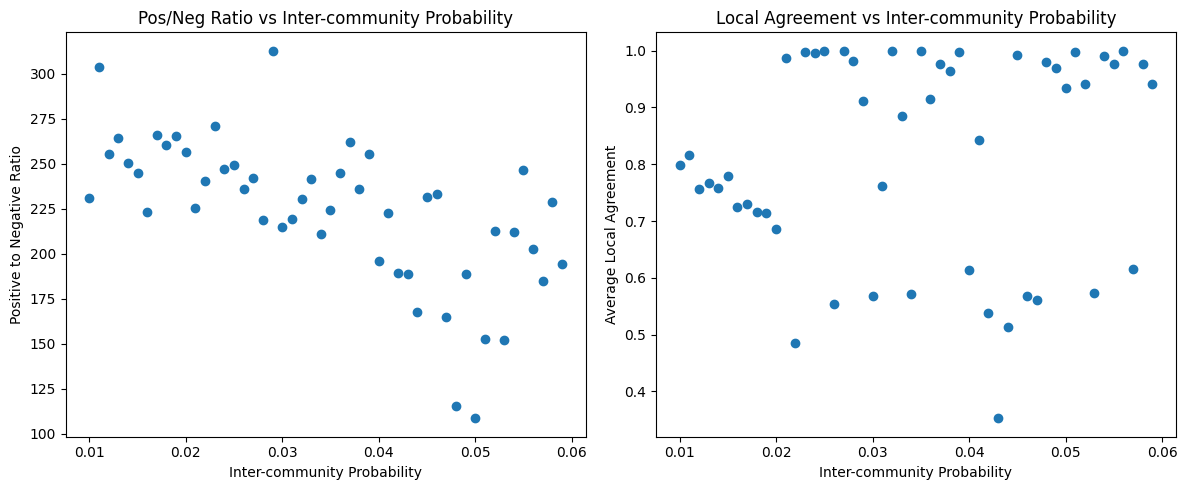

In [192]:
# Create list of inter-community probabilities from 0.01 to 0.05
p_inters = np.arange(0.01, 0.06, 0.001)

# Run experiments for different inter-community probabilities
results = []
for p_inter in p_inters:
    G = create_sbm_graph(
        sizes=[200, 200, 200, 200, 200],  # 5 equal-sized communities
        p_intra=0.1,                      # fixed intra-community probability
        p_inter=p_inter                    # varying inter-community probability
    )
    
    # Run experiment with visualization off to avoid clutter
    model, pos_to_neg_ratio, pos_to_neg_ratio_var, average_local_agreement = run_experiment(
        graph=G,
        threshold=0.6,
        steps=50,
        visualize=False
    )
    
    results.append({
        'p_inter': p_inter,
        'pos_to_neg_ratio': pos_to_neg_ratio,
        'local_agreement': average_local_agreement
    })

# Create scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot pos/neg ratio vs inter-community probability
p_inter_vals = [r['p_inter'] for r in results]
ratios = [r['pos_to_neg_ratio'] for r in results]
ax1.scatter(p_inter_vals, ratios)
ax1.set_xlabel('Inter-community Probability')
ax1.set_ylabel('Positive to Negative Ratio')
ax1.set_title('Pos/Neg Ratio vs Inter-community Probability')

# Plot local agreement vs inter-community probability
agreements = [r['local_agreement'] for r in results]
ax2.scatter(p_inter_vals, agreements)
ax2.set_xlabel('Inter-community Probability')
ax2.set_ylabel('Average Local Agreement')
ax2.set_title('Local Agreement vs Inter-community Probability')

plt.tight_layout()
plt.show()


Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
EXPERIMENT STATS:
Total posts: 45418
Positive posts: 45087 (0.99)
Negative posts: 194 (0.00)

Positive posts ratio: 232.41
Variance in pos/neg ratio over time: nan

Final opinion range: 0.0000
Final opinion variance: 0.0000
Final opinion std dev: 0.0000
Final average local agreement: 0.8120
Final local agreement variance: 0.0127
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
EXPERIMENT STATS:
Total posts: 48051
Positive posts: 47717 (0.99)
Negative posts: 189 (0.00)

Positive posts ratio: 252.47
Variance in pos/neg ratio over time: nan

Final opinion range: 0.0000
Final opinion variance: 0.0000
Final opinion std dev: 0.0000
Final average local agreement: 0.7839
Final local agreement variance: 0.0267
Initial opinion distribution:
  Positive o

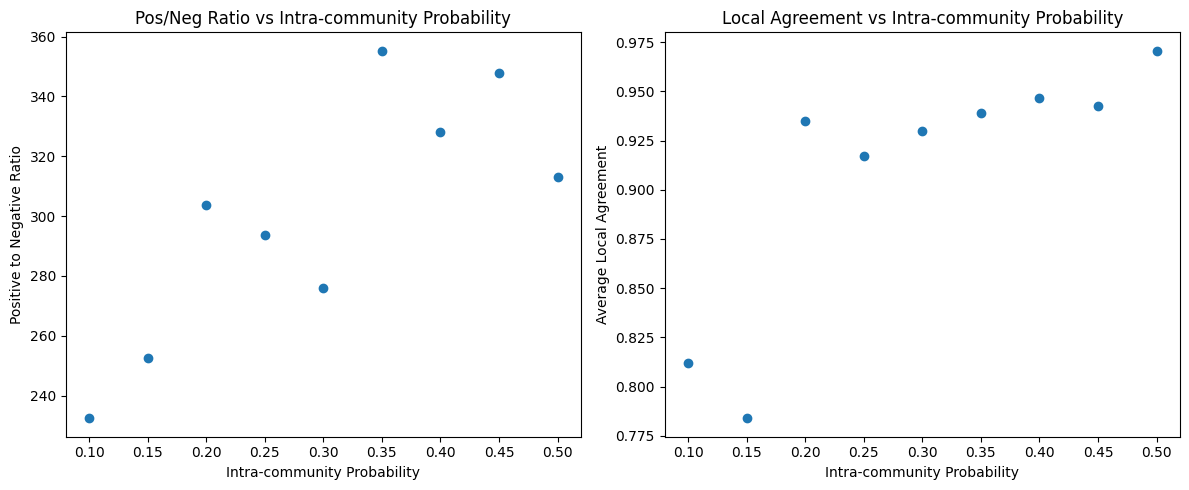

In [191]:
# Create list of intra-community probabilities from 0.1 to 0.5
p_intras = np.arange(0.1, 0.51, 0.05)

# Run experiments for different intra-community probabilities
results = []
for p_intra in p_intras:
    G = create_sbm_graph(
        sizes=[200, 200, 200, 200, 200],  # 5 equal-sized communities
        p_intra=p_intra,                  # varying intra-community probability
        p_inter=0.01                      # fixed inter-community probability
    )
    
    # Run experiment with visualization off to avoid clutter
    model, pos_to_neg_ratio, pos_to_neg_ratio_var, average_local_agreement = run_experiment(
        graph=G,
        threshold=0.6,
        steps=50,
        visualize=False
    )
    
    results.append({
        'p_intra': p_intra,
        'pos_to_neg_ratio': pos_to_neg_ratio,
        'local_agreement': average_local_agreement
    })

# Create scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot pos/neg ratio vs intra-community probability
p_intra_vals = [r['p_intra'] for r in results]
ratios = [r['pos_to_neg_ratio'] for r in results]
ax1.scatter(p_intra_vals, ratios)
ax1.set_xlabel('Intra-community Probability')
ax1.set_ylabel('Positive to Negative Ratio')
ax1.set_title('Pos/Neg Ratio vs Intra-community Probability')

# Plot local agreement vs intra-community probability
agreements = [r['local_agreement'] for r in results]
ax2.scatter(p_intra_vals, agreements)
ax2.set_xlabel('Intra-community Probability')
ax2.set_ylabel('Average Local Agreement')
ax2.set_title('Local Agreement vs Intra-community Probability')

plt.tight_layout()
plt.show()
